In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import cv2

# from google.colab.patches import cv2_imshow


## Load the iris dataset

In [2]:
# load the iris dataset
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Create a dataframe of feature and a dataframe of label

In [3]:
#dataframe of feature
df_feature=df.loc[:, ["sepal.length",	"sepal.width", "petal.length","petal.width"]]

df_feature.head()


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#dataframe of label
df_label=df.loc[:, ["variety"]]

df_label.head()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


## Manual Hyperparameters tuning

*  Splitting training/testing
*  Freezing the test set
*  Spitting training/validation (to retrieve a validation set for hyperparameters tuning)
*  Defining hyperparameters to be tuned (in this case 2 and 2 hyperparameters)
*  Initializing 4 classifiers with the 4 combinations of hyperparameters
*  Training the 4 classifiers
*  Testing the 4 classifiers performance on the validation set
*  Choosing the best combination of hyperparameters

In [5]:
# Train/Test split (10% of the training dataset will be used for testing)
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_label, test_size = .10)

print("original set len", len(df_feature))
print("training set len", len(x_train))
print("test set len", len(x_test))

# Train/Test split (20% of the new training dataset will be used for validation)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.20)

print("training set new len", len(x_train))
print("valid set len", len(x_valid))

original set len 150
training set len 135
test set len 15
training set new len 108
valid set len 27


Training the different classifiers (i.e., the same classifier with different combinantion of hyperparameters).
* `n_estimators` = number of decison trees (typically between 10 and 1000).
* `max_depth` = defines the maximum depth of the tree, i.e. the number of decision nodes in each decision tree. If `None`, then nodes are expanded until all leaves are pure.

We want to tune the following hyperparameters:
* `n_estimators` = 100,200
* `max_depth` = 2,3


In [6]:
clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 2)
clf2 = RandomForestClassifier(n_estimators = 100, max_depth = 3)
clf3 = RandomForestClassifier(n_estimators = 200, max_depth = 2)
clf4 = RandomForestClassifier(n_estimators = 200, max_depth = 3)

trainedclf1=clf1.fit(x_train, y_train)
trainedclf2=clf2.fit(x_train, y_train)
trainedclf3=clf3.fit(x_train, y_train)
trainedclf4=clf4.fit(x_train, y_train)

/home/lucachiese/Documents/master/modules/notes/Master-QML/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lucachiese/Documents/master/modules/notes/Master-QML/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lucachiese/Documents/master/modules/notes/Master-QML/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lucachiese/Documents/master/modules/n

Validating the best classifier (i.e., the one with the best combination of hyperparameters (i.e., the one with the highest performance on the validation set))

In [7]:
prediction1=trainedclf1.predict(x_valid)
prediction2=trainedclf2.predict(x_valid)
prediction3=trainedclf3.predict(x_valid)
prediction4=trainedclf4.predict(x_valid)

print(accuracy_score(y_valid, prediction1))
print(accuracy_score(y_valid, prediction2))
print(accuracy_score(y_valid, prediction3))
print(accuracy_score(y_valid, prediction4))

0.8518518518518519
0.9259259259259259
0.8518518518518519
0.8518518518518519


We finally test the performance of the best classifier after hyperparameters tuning on the test set

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictiontestset=trainedclf2.predict(x_test)

# Calculate the accuracy
print(accuracy_score(y_test, predictiontestset))

1.0


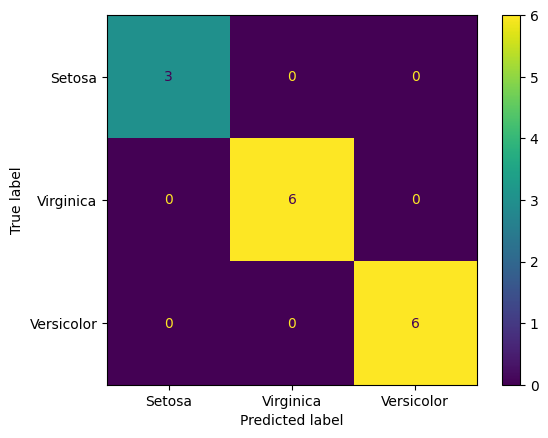

In [12]:
#confusion matrix
classes=["Setosa", "Virginica", "Versicolor"]
cm = confusion_matrix(y_test, predictiontestset, labels=classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)

cmd.plot()

## Hyperparameters tuning: a more complex but accepted scenario

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

This situation is called **overfitting**.

To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test, y_test`.


When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally.

This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.

To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is **cross-validation**. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called __k-fold CV__, the training set is split into k smaller sets.

The following procedure is followed for each of the k “folds”:

- A model is trained using k-1 of the folds as training data;

- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.

In [13]:
# configure the cross-validation procedure
loop = KFold(n_splits=3, shuffle=True, random_state=1)

# define the model
clf = RandomForestClassifier()

# define search space
grid = dict()
grid['n_estimators'] = [10, 100, 500]
grid['max_depth'] = [2, 4, 6]

# define search for hyperparameters tuning
search = GridSearchCV(clf, grid, scoring='accuracy', cv=loop)

# execute search
result = search.fit(x_train, y_train)

/home/lucachiese/Documents/master/modules/notes/Master-QML/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lucachiese/Documents/master/modules/notes/Master-QML/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lucachiese/Documents/master/modules/notes/Master-QML/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lucachiese/Documents/master/modules/n

In [14]:
# get the best performing model fit on the whole training dataset (i.e., the one with the best hyperparameters)
best_model = result.best_estimator_
print("the best model is ", best_model)

the best model is  RandomForestClassifier(max_depth=4, n_estimators=10)


In [15]:
#predictions on the test set
predictions=best_model.predict(x_test)
print("the accuracy is ", accuracy_score(y_test,predictions))

the accuracy is  1.0


In [16]:

# A global overview of cross validation
search.cv_results_

{'mean_fit_time': array([0.02575437, 0.12558794, 0.58026942, 0.01531712, 0.12423491,
        0.59833217, 0.01504556, 0.11665726, 0.56182281]),
 'std_fit_time': array([0.00189962, 0.00458382, 0.02615067, 0.00013163, 0.00125034,
        0.01670119, 0.00033666, 0.00402512, 0.02871925]),
 'mean_score_time': array([0.00808605, 0.01165517, 0.03688542, 0.0049235 , 0.01105364,
        0.03831013, 0.00459782, 0.01013327, 0.03454534]),
 'std_score_time': array([2.98975398e-04, 2.99242408e-04, 1.59882620e-03, 1.30806774e-04,
        4.83528096e-04, 1.20639965e-03, 3.70633335e-05, 3.20728910e-04,
        1.66010377e-04]),
 'param_max_depth': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
              mask=[False, False, False, False, False, False, False, False,
                    Fa

In [17]:
#print keys of interest for viewing hyperparamenters.
print(search.cv_results_['params'])
print(search.cv_results_['mean_test_score']) #mean of performance of each fold to discriminate hyperparameters

[{'max_depth': 2, 'n_estimators': 10}, {'max_depth': 2, 'n_estimators': 100}, {'max_depth': 2, 'n_estimators': 500}, {'max_depth': 4, 'n_estimators': 10}, {'max_depth': 4, 'n_estimators': 100}, {'max_depth': 4, 'n_estimators': 500}, {'max_depth': 6, 'n_estimators': 10}, {'max_depth': 6, 'n_estimators': 100}, {'max_depth': 6, 'n_estimators': 500}]
[0.9537037  0.9537037  0.9537037  0.96296296 0.96296296 0.96296296
 0.96296296 0.9537037  0.96296296]
